In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import tensorflow
import os
import cv2
from pathlib import Path

In [4]:
# storing labels for train test
labels_train = []
labels_test = []

# storing path for train test
path_train = []
path_test = []

In [5]:
train_path = "./train_zip/train/"
test_path = "./test_zip/test/"

for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"):
        labels_train.append(filename.split('_')[0])
        path_train.append(os.path.join(train_path, filename))

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"):
        labels_test.append(filename.split('_')[0])
        path_test.append(os.path.join(test_path, filename))


label_train_unique = np.unique(np.array(labels_train))
label_test_unique = np.unique(np.array(labels_test))


print("Unique labels for train: ", label_train_unique)
print("Number of jpg images in train: ", len(path_train))

print("\nUnique labels are for test: ", label_test_unique)
print("Number of jpg images for train: ", len(path_test))

Unique labels for train:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images in train:  240

Unique labels are for test:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images for train:  60


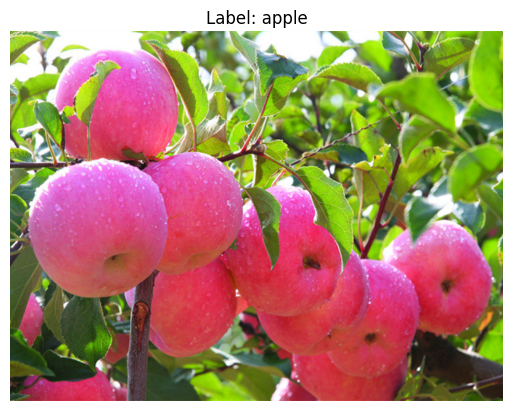

In [6]:
#Verify training data
image = cv2.imread(path_train[60])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_train[0])
plt.axis('off')
plt.show()

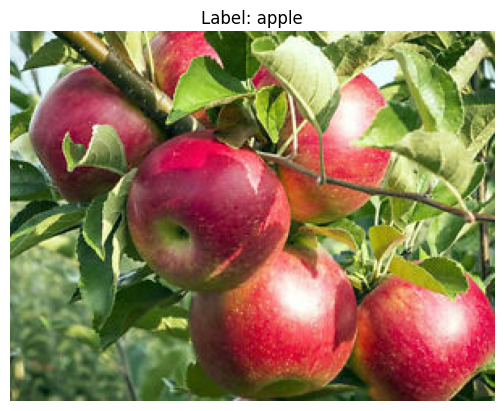

In [7]:
#Verify test data
image = cv2.imread(path_test[0])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_test[0])
plt.axis('off')
plt.show()

In [8]:
X_train = []

for path in path_train:
    
    img = cv2.imread(path)

    #Convert BGR to RGB
    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #Resize the image

    final_img =  cv2.resize(rgb_img, (50,50))
    
    X_train.append(final_img)

X_train = np.array(X_train)

In [9]:
#The same for test images
X_test = []

for path in path_test:
    
    img = cv2.imread(path)
    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    final_img =  cv2.resize(rgb_img, (50,50))
    
    X_test.append(final_img)

X_test = np.array(X_test)

In [10]:
#Fruits label
fruits = {}

for i in range(len(label_train_unique)):
    fruits[label_train_unique[i]] = i
    
fruits

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [11]:
# store the values in a temporary list
temp_train = []
temp_test = []

# all the fruits names are being mapped
for label in labels_train:
    temp_train.append(fruits.get(label))

for label in labels_test:
    temp_test.append(fruits.get(label))

print("Length of train data: ", len(temp_train))
print("Length of test data: ", len(temp_test))

Length of train data:  240
Length of test data:  60


In [12]:
y_train = keras.utils.to_categorical(temp_train, 4)
y_test = keras.utils.to_categorical(temp_test, 4)

Length of X_train:  240


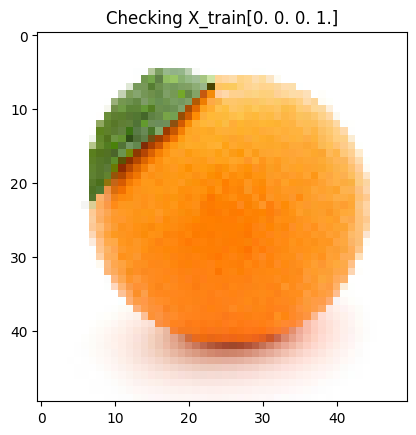

In [13]:
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[200])
plt.title("Checking X_train"+str(y_train[200]))
plt.show()

Length of X_test:  60


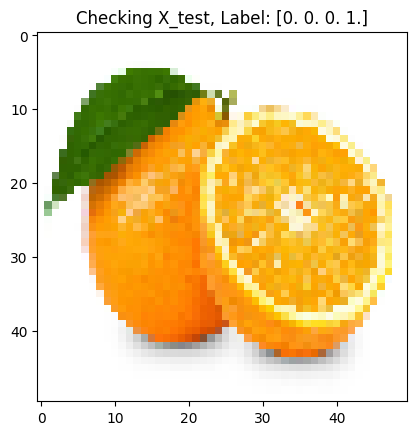

In [14]:
print("Length of X_test: ", len(X_test))
plt.imshow(X_test[45])
plt.title("Checking X_test, Label: " + str(y_test[45]))
plt.show()

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(50, 50, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        36928     
                                                        

In [40]:
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/150
7/7 [==============================] - 2s 315ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3513 - val_accuracy: 0.9583
Epoch 2/150
7/7 [==============================] - 2s 276ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2121 - val_accuracy: 0.9583
Epoch 3/150
7/7 [==============================] - 2s 283ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1670 - val_accuracy: 0.9583
Epoch 4/150
7/7 [==============================] - 2s 279ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 5/150
7/7 [==============================] - 2s 289ms/step - loss: 0.0061 - accuracy: 0.9954 - val_loss: 0.2972 - val_accuracy: 0.8750
Epoch 6/150
7/7 [==============================] - 2s 349ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.3931 - val_accuracy: 0.8333
Epoch 7/150
7/7 [==============================] - 2s 290ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 0.9583
Epoch 8/150
7

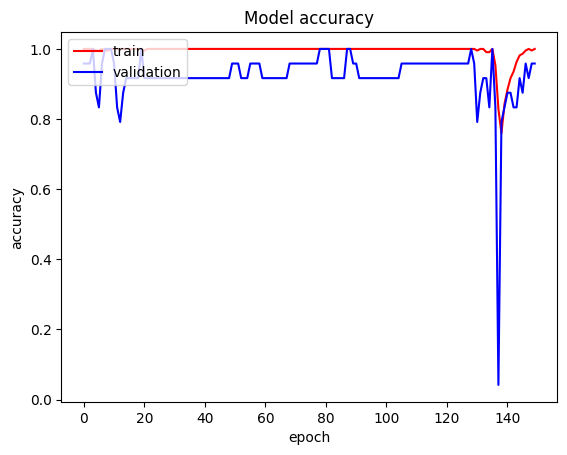

In [41]:
# displaying the model accuracy
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

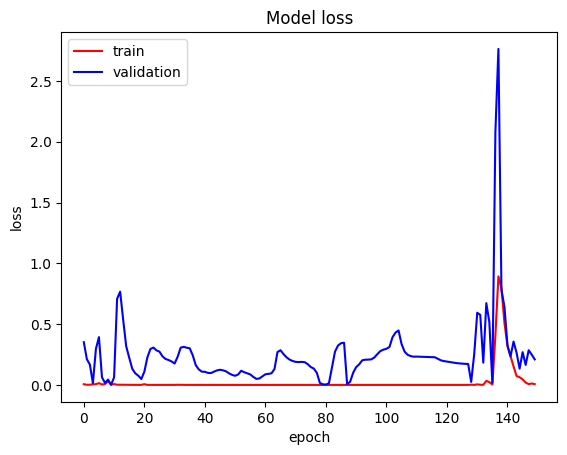

In [42]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [43]:
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("model_weights.h5")

In [44]:
score, accuracy = model.evaluate(X_test, y_test)
print('Test score achieved:', score)
print('Test accuracy achieved:', accuracy)

2/2 [==============================] - 0s 65ms/step - loss: 1.3641 - accuracy: 0.8667
Test score achieved: 1.3641282320022583
Test accuracy achieved: 0.8666666746139526


In [45]:
pred = model.predict(X_test)

2/2 [==============================] - 0s 56ms/step


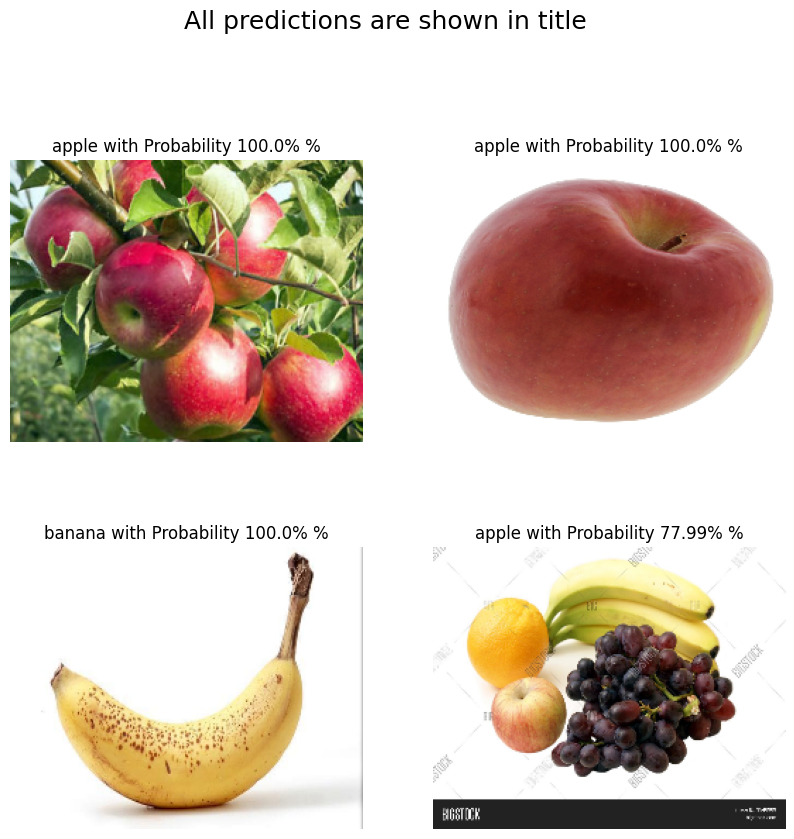

In [49]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)


count=0
for i in range(2):    
    for j in range(2):  
        
        img = cv2.imread(path_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(fruits.keys()):
             if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"
            
        
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')

        count+=13
        
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()
